In [4]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [5]:
df = pd.read_csv('C:/Users/ShekharBiswas/Desktop/Ubiqum/week6/household_power_consumption.csv', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')


#df['day'] = df.index.day_name()
#df['month'] = df.index.month_name()
#df['hour'] = df.index.hour


#df.tail()

#df_null=df.isnull().sum()
#df=df.fillna(df.mean())
df.columns.values[4:7] = ['kitchen', 'laundry', 'wh_ac']
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,wh_ac
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


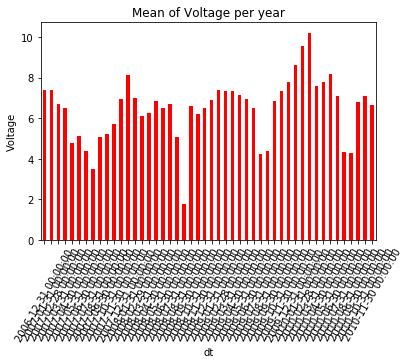

In [6]:
df['wh_ac'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Mean of Voltage per year')
plt.show()

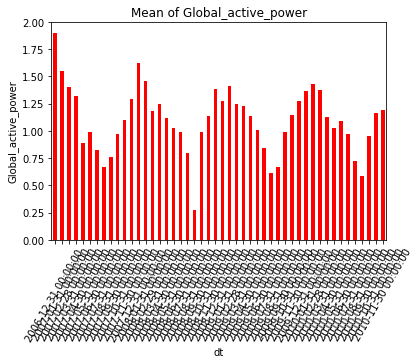

In [7]:
df['Global_active_power'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Mean of Global_active_power')
plt.show()

In [8]:
print (df.isnull().sum())
#df['Global_active_power'].mean()

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
#print (droping_list_all)
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
        
#print (df.isnull().sum())        


Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
kitchen                  25979
laundry                  25979
wh_ac                    25979
dtype: int64


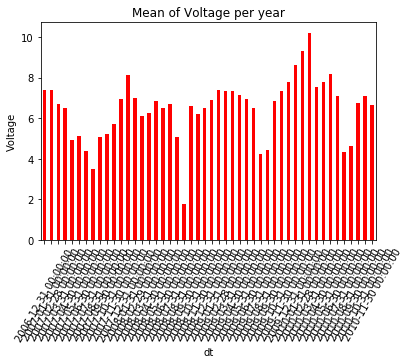

In [9]:
df['wh_ac'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Mean of Voltage per year')
plt.show()

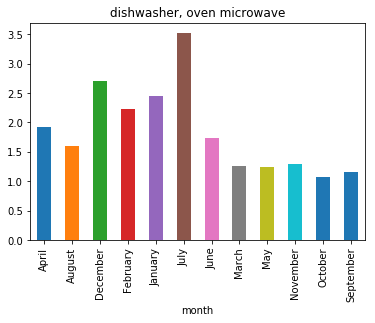

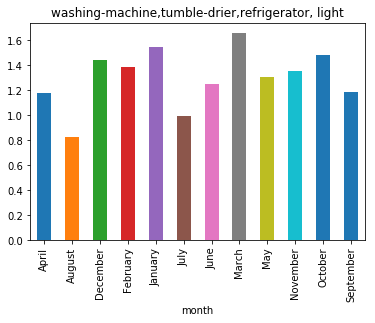

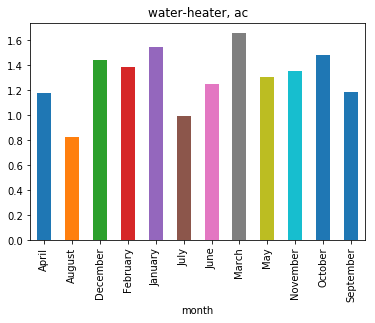

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,wh_ac,day,month,hour
dt,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,December,17
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,December,17
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,December,17
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,December,17
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,December,17


In [10]:



df['day'] = df.index.day_name()
df['month'] = df.index.month_name()
df['hour'] = df.index.hour


#df.groupby([pd.Grouper('AS'), 'day'])['Global_active_power'].mean().plot(kind = "bar")
#plt.title('Global active power')
#plt.show()

df['2006': '2010'].groupby('day')['kitchen'].mean().plot(kind = "bar")
plt.title('dishwasher, oven microwave')
#plt.show()

df['2006': '2010'].groupby('day')['laundry'].mean().plot(kind = "bar")
plt.title('washing-machine,tumble-drier,refrigerator, light')
#plt.show()

df['2006': '2006'].groupby('day')['laundry'].mean().plot(kind = "bar")
plt.title('water-heater, ac')
#plt.show()
df.dtypes
df.head()


# Month wise values


df['2006': '2010'].groupby('month')['kitchen'].mean().plot(kind = "bar")
plt.title('dishwasher, oven microwave')
plt.show()

df['2006': '2010'].groupby('month')['laundry'].mean().plot(kind = "bar")
plt.title('washing-machine,tumble-drier,refrigerator, light')
plt.show()

df['2006': '2010'].groupby('month')['laundry'].mean().plot(kind = "bar")
plt.title('water-heater, ac')
plt.show()
df.dtypes
df.head()

#df[,'Global_active_power'].plot(kind='bar')
#plt.xticks(rotation=90)
#plt.ylabel('Global_active_power')
#plt.title('Average Global_active_power per month')
#plt.show()


In [11]:


#df['Sub_metering_1'].resample('H').mean().plot(kind = "bar")



#df[,'Global_active_power'].plot(kind='bar')
#plt.xticks(rotation=90)
#plt.ylabel('Global_active_power')
#plt.title('Average Global_active_power per month')
#plt.show()


df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,wh_ac,day,month,hour
dt,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,December,17
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,December,17
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,December,17
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,December,17
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,December,17


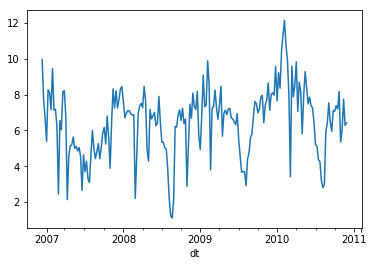

In [12]:
#df.describe()
#.plot(kind = "bar")
#df.columns
#df.drop(['day', 'month'], axis=1, inplace = True)

#df = df.resample('H').mean()
#df['day'] = df.index.day_name()
#df['month'] = df.index.month_name()
#df['hour'] = df.index.hour
df.head()
#df.groupby([df.index.hour, df.index.day_name()] )['Global_active_power'].mean().plot(kind = "bar")
df['wh_ac'].resample('W').mean().plot()
#groupby([df.index.hour] )['Global_active_power'].mean().

#df1.groupby(np.arange(len(df1))//4).mean().plot(kind = "bar")
#np.arange(len(df.groupby([df.index.hour] )['Global_active_power'].mean()))
#plt.show()
#df.groupby('hour')['Global_active_power'].mean().plot(kind = "bar")
#df.resample('4H')['Global_active_power'].mean().plot(kind = "bar")

#df['Global_active_power'].resample('2Y').sum().plot(kind = "bar") 

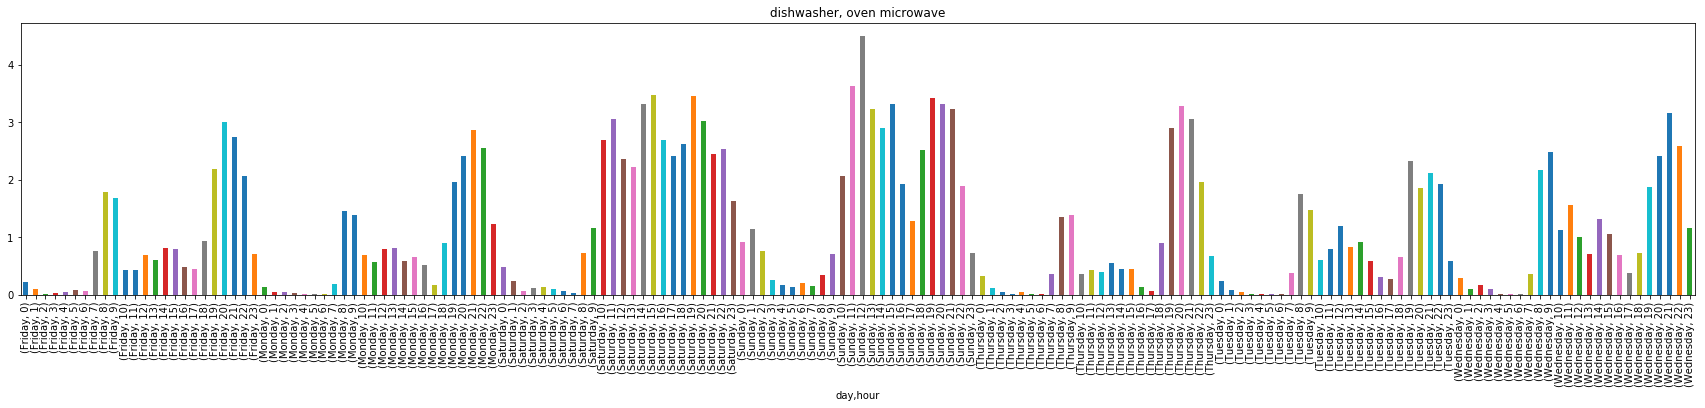

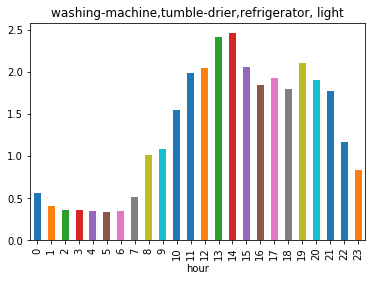

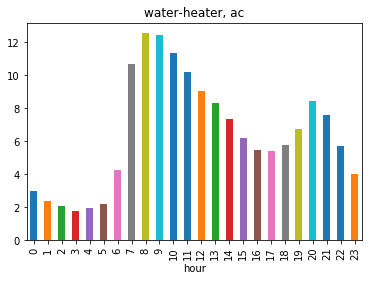

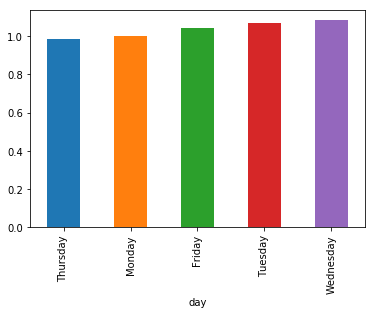

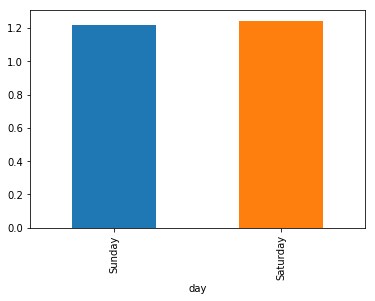

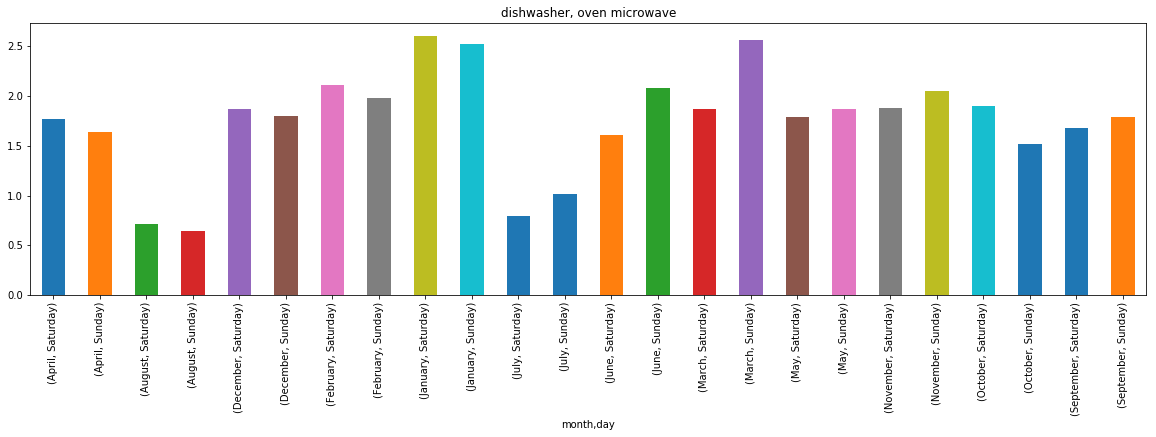

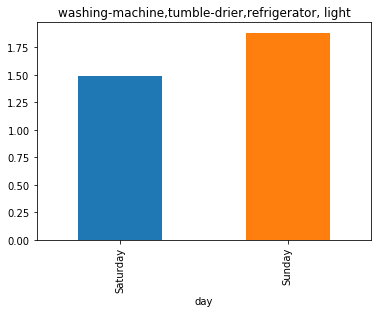

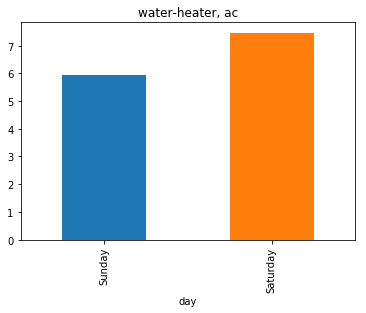

In [13]:
plt.figure(figsize=(30,5))
df.groupby(['day','hour'])['kitchen'].mean().plot(kind = "bar")
plt.title('dishwasher, oven microwave')
plt.show()
df.groupby('hour')['laundry'].mean().plot(kind = "bar")
plt.title('washing-machine,tumble-drier,refrigerator, light')
plt.show()
df.groupby('hour')['wh_ac'].mean().plot(kind = "bar")
plt.title('water-heater, ac')
plt.show()


###


#df['wday'] = df.index.dayofweek < 5

df[ df.index.dayofweek < 5].groupby('day')['Global_active_power'].mean().sort_values().plot(kind = "bar")
plt.show()
df[ df.index.dayofweek >= 5].groupby('day')['Global_active_power'].mean().sort_values().plot(kind = "bar")
plt.show()

plt.figure(figsize=(20,5))
df[ df.index.dayofweek >= 5].groupby(['month','day'])['kitchen'].mean().sort_index().plot(kind = "bar")
plt.title('dishwasher, oven microwave')
plt.show()

df[ df.index.dayofweek >= 5].groupby('day')['laundry'].mean().sort_values().plot(kind = "bar")
plt.title('washing-machine,tumble-drier,refrigerator, light')
plt.show()

df[ df.index.dayofweek >= 5].groupby('day')['wh_ac'].mean().sort_values().plot(kind = "bar")
plt.title('water-heater, ac')
plt.show()





#.plot(kind = "line")
#plt.show()
#df.groupby('wday')['Global_active_power'].count().plot(kind = "bar")

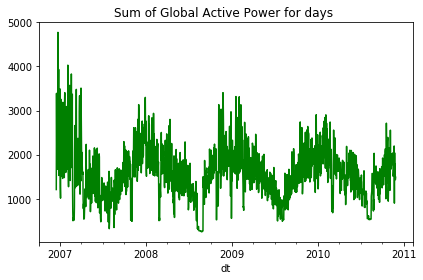

In [14]:

df.Global_active_power.resample('D').sum().plot(title='Sum of Global Active Power for days ',color='green') 
plt.tight_layout()
plt.show()  

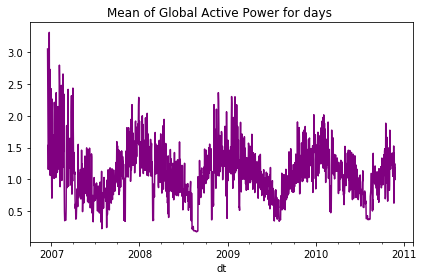

In [15]:

df.Global_active_power.resample('D').mean().plot(title='Mean of Global Active Power for days ',color='purple') 
plt.tight_layout()
plt.show()  

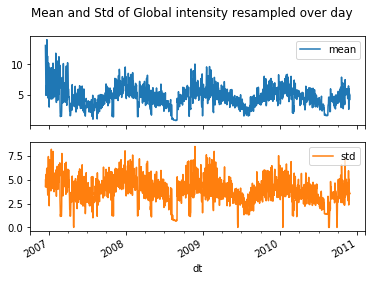

In [16]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Mean and Std of Global intensity resampled over day')
plt.show()

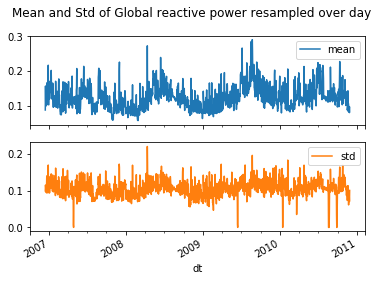

In [17]:
      
r = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Mean and Std of Global reactive power resampled over day')
plt.show()

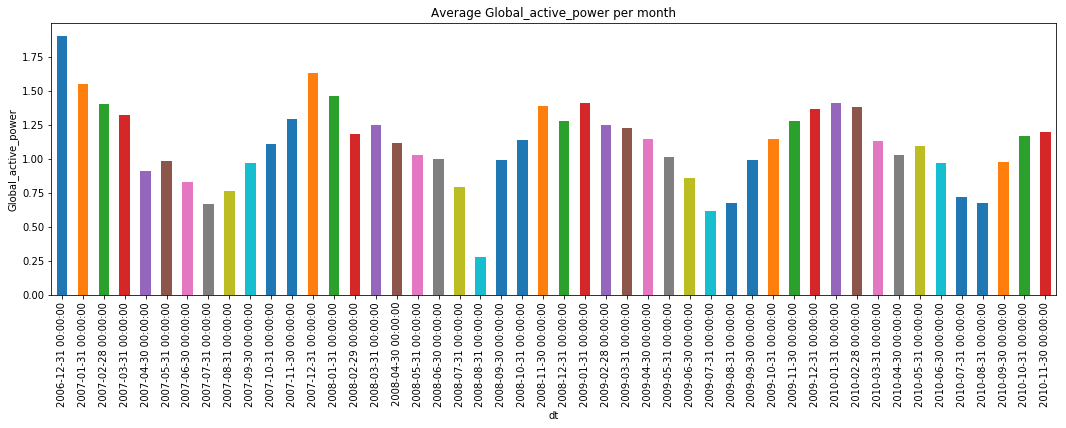

In [18]:
### Mean of 'Global_active_power' resampled over month
plt.figure(figsize=(18,5))
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Average Global_active_power per month')

plt.show()

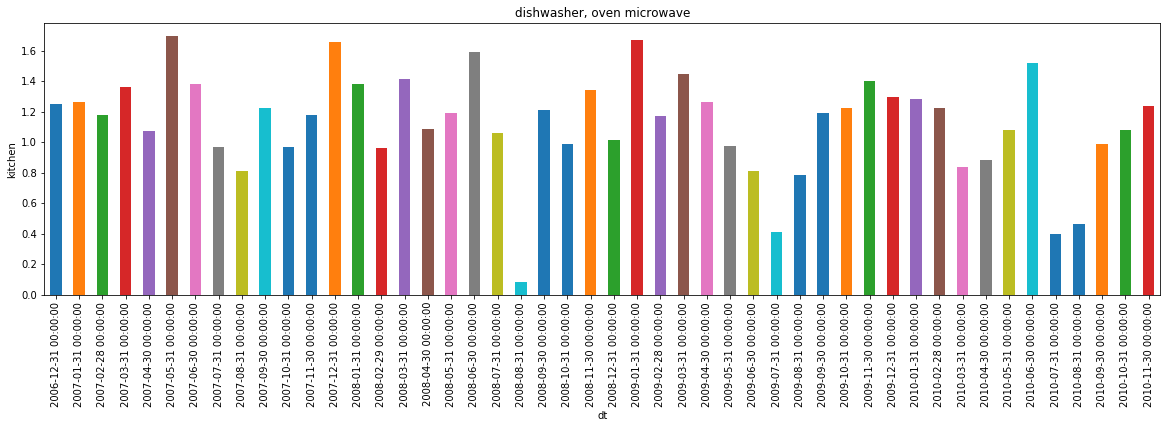

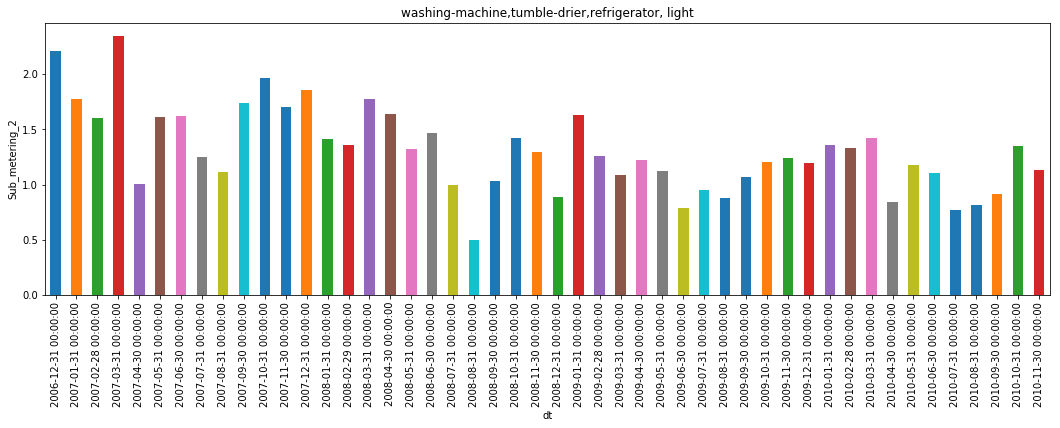

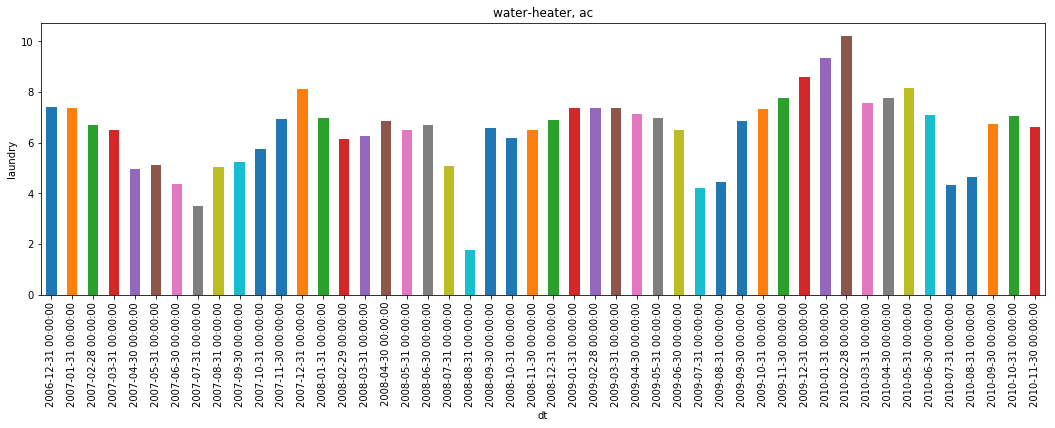

In [23]:
plt.figure(figsize=(20,5))
df['kitchen'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('kitchen')
plt.title('dishwasher, oven microwave')

plt.savefig('m1.png', bbox_inches='tight', dpi = 300)
plt.show()

plt.figure(figsize=(18,5))
df['laundry'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Sub_metering_2')
plt.title('washing-machine,tumble-drier,refrigerator, light')

plt.savefig('m2.png', bbox_inches='tight', dpi = 300)
plt.show()

plt.figure(figsize=(18,5))
df['wh_ac'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('laundry')
plt.title('water-heater, ac')

plt.savefig('m3.png', bbox_inches='tight', dpi = 300)
plt.show()

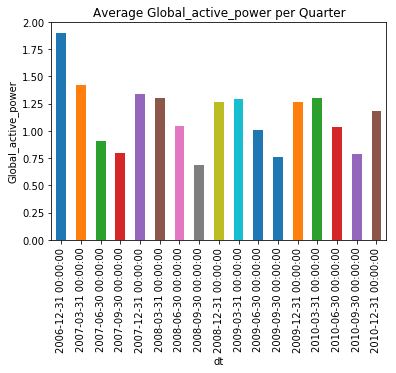

In [20]:
### Sum of 'Global_active_power' resampled over Quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Average Global_active_power per Quarter')
plt.show()

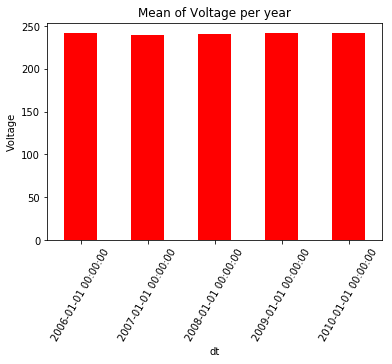

In [21]:
## mean of 'Voltage' resampled over year
df['Voltage'].resample('AS').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Mean of Voltage per year')
plt.show()

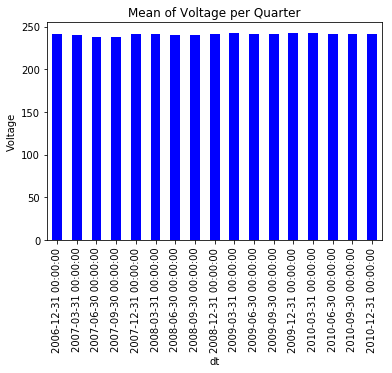

<Figure size 432x288 with 0 Axes>

In [56]:
## mean of 'Voltage' resampled over year
df['Voltage'].resample('Q').mean().plot(kind='bar', color='blue')
plt.xticks(rotation=90)
plt.ylabel('Voltage')
plt.title('Mean of Voltage per Quarter')
plt.show()
plt.savefig('filename.png', dpi = 300)


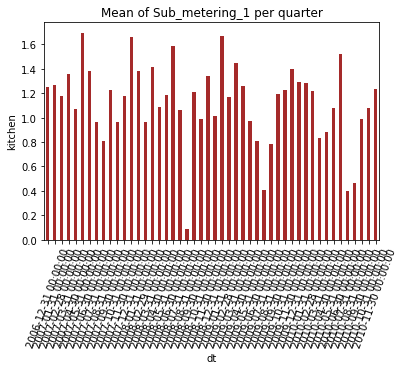

In [57]:
df['kitchen'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=70)
plt.ylabel('kitchen')
plt.title('Mean of Sub_metering_1 per quarter')
plt.show()

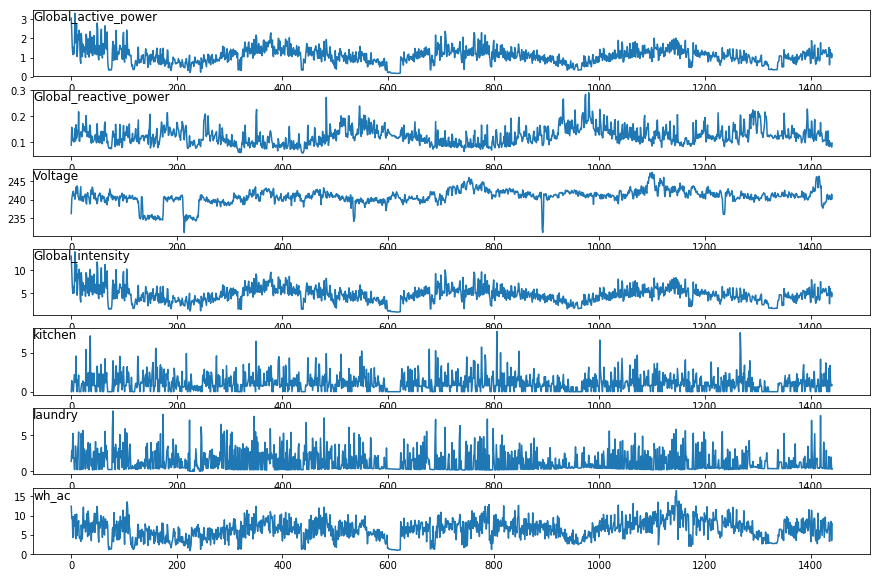

In [59]:
cols = [0, 1, 2, 3,4,5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='left')
	i += 1
plt.show()



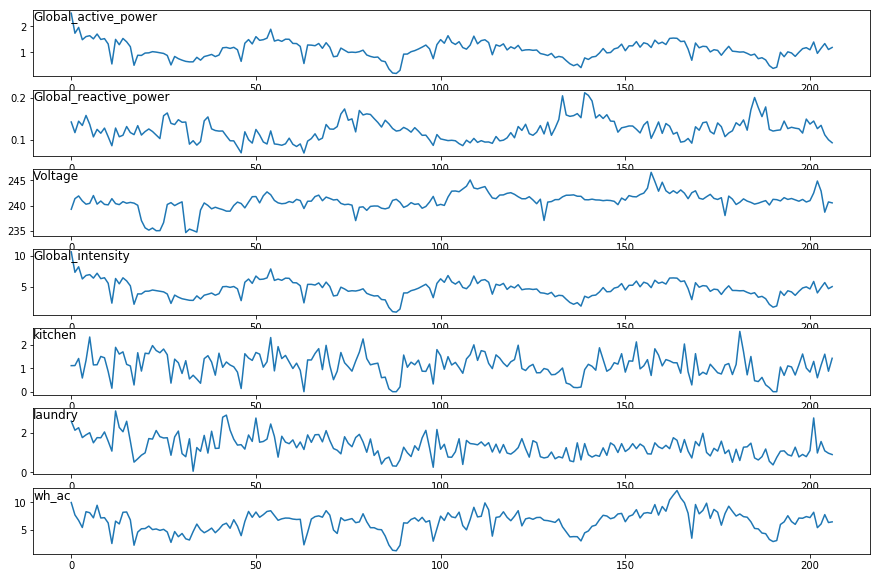

In [58]:
## resampling over week and computing mean
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = df.resample('W').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='left')
	i += 1

plt.show()

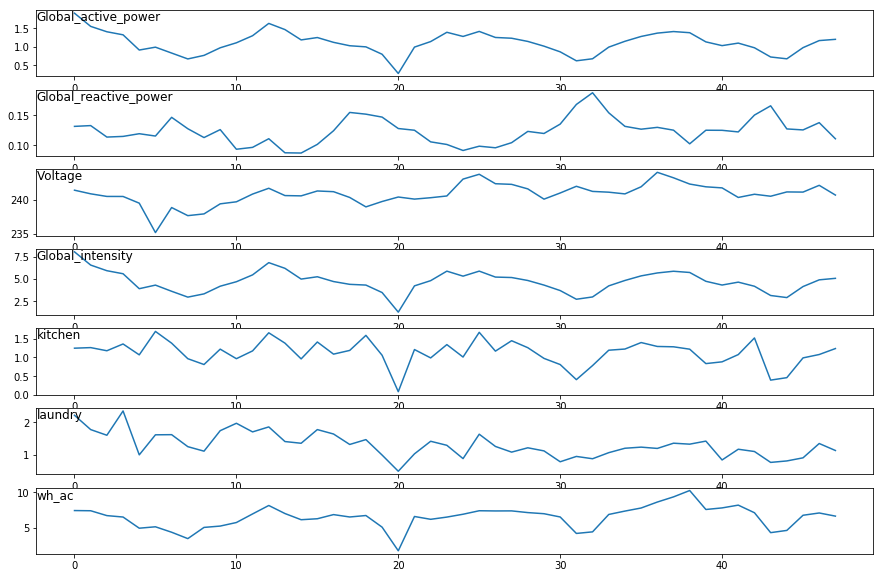

In [60]:
## resampling over Month and computing mean
cols = [0, 1, 2, 3,4, 5, 6]
i = 1
groups=cols
values = df.resample('M').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='left')
	i += 1

plt.show()

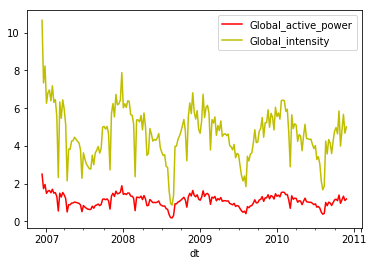

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,wh_ac,day,month,hour
dt,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,December,17
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,December,17
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,December,17
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,December,17
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,December,17


In [65]:
#df.Global_reactive_power.resample('W').mean().plot(color='grey', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
#df.Sub_metering_1.resample('W').mean().plot(color='grey', legend=True)
df.Global_intensity.resample('W').mean().plot(color='y', legend=True)
plt.show()
df.head()

C:\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


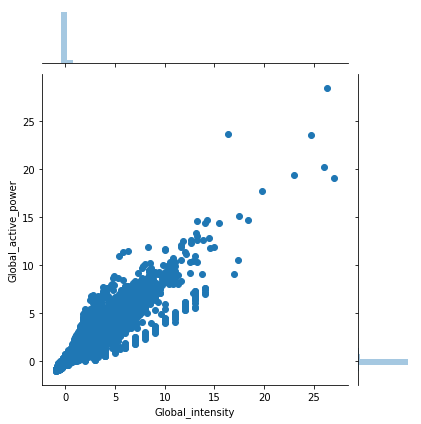

In [66]:
df.drop([ 'day', 'month','hour'], axis=1, inplace = True)
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

C:\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


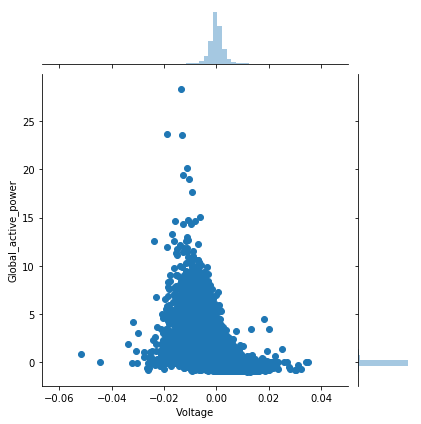

In [67]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

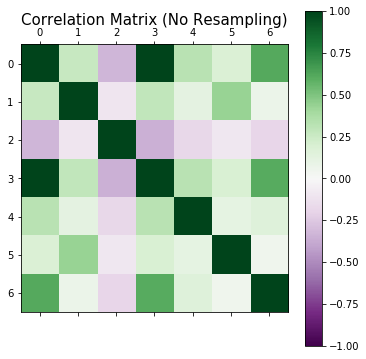

In [68]:
plt.figure(figsize=(6,6))
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn',fignum=1)
plt.title('Correlation Matrix (No Resampling)', size=15)
plt.colorbar()
plt.show()

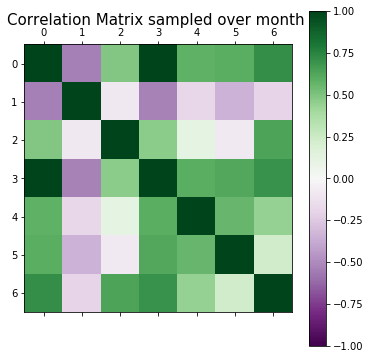

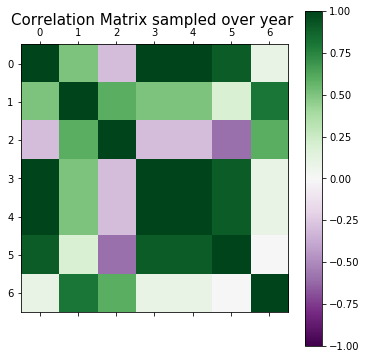

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,wh_ac
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [72]:
plt.figure(figsize=(6,6))
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn',fignum=1)
plt.title('Correlation Matrix sampled over month ', size=15)
plt.colorbar()
plt.show()

plt.figure(figsize=(6,6))
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn',fignum=1)
plt.title('Correlation Matrix sampled over year ', size=15)
plt.colorbar()
plt.show()

df.head()

In [84]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [85]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,kitchen,laundry,wh_ac
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [86]:
df_resample.max() - df_resample.min()

Global_active_power       6.436533
Global_reactive_power     0.774333
Voltage                  26.067500
Global_intensity         27.880000
kitchen                  48.366667
laundry                  46.433333
wh_ac                    21.550000
dtype: float64

In [87]:
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


In [154]:
#Without scaling
values = df_resample.values 
reframed = series_to_supervised( values, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)   var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   4.222889   0.229000  234.643889  18.100000        0.0   0.527778   
2   3.632200   0.080033  234.580167  15.600000        0.0   6.716667   
3   3.400233   0.085233  233.232500  14.503333        0.0   1.433333   
4   3.268567   0.075100  234.071500  13.916667        0.0   0.000000   
5   3.056467   0.076667  237.158667  13.046667        0.0   0.416667   

   var7(t-1)   var1(t)  
1  16.861111  3.632200  
2  16.866667  3.400233  
3  16.683333  3.268567  
4  16.783333  3.056467  
5  17.216667  2.200133  


Mean squared error:0.48 


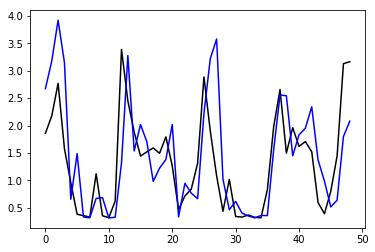

In [167]:
#kNN

values = reframed.values

n_train_time = 365*24*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1].reshape(-1,7), train[:, -1]
test_X, test_y = test[:, :-1].reshape(-1,7), test[:, -1]

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(train_X, train_y) 
y_pred = neigh.predict(test_X)


print("Mean squared error:%.2f "
      % mean_squared_error(test_y, y_pred))

#plt.scatter(test_y[1:10], y_pred[1:10],  color='black')
plt.plot(test_y[1:50], color = 'black')
plt.plot(y_pred[1:50], color = 'blue')

plt.show()

Mean squared error:0.83 


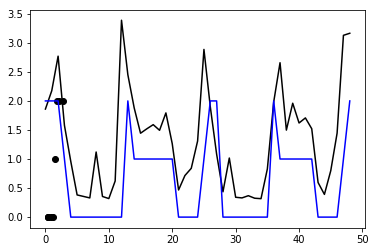

In [168]:

values = reframed.values

n_train_time = 365*24*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1].reshape(-1,7), train[:, -1].astype(int)
test_X, test_y = test[:, :-1].reshape(-1,7), test[:, -1]
clf = svm.SVC()
clf.fit(train_X, train_y) 
y_pred = clf.predict(test_X)

print("Mean squared error:%.2f "
      % mean_squared_error(test_y, y_pred))

plt.scatter(test_y[1:10], y_pred[1:10],  color='black')
plt.plot(test_y[1:50], color = 'black')
plt.plot(y_pred[1:50], color = 'blue')
plt.show()


Coefficients: 
 [ 0.13398875  0.56599216 -0.004037    0.19377797 -0.03669655 -0.03185063
 -0.01957519]
Mean squared error:0.33 
Variance score: 0.50


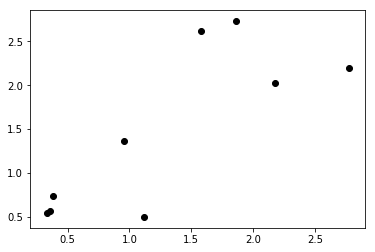

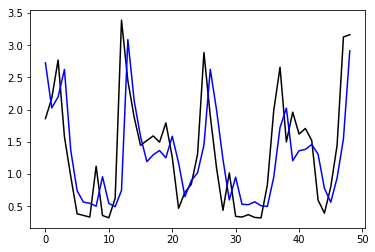

In [169]:


#Linear Regression

values = reframed.values

n_train_time = 365*24*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1].reshape(-1,7), train[:, -1]
test_X, test_y = test[:, :-1].reshape(-1,7), test[:, -1]

#print (test_X.shape)
#print (test_y.shape)
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_y)

# Make predictions using the testing set
y_pred = regr.predict(test_X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error:%.2f "
      % mean_squared_error(test_y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, y_pred))

# Plot outputs

#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
#plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#print(test_y[1:10])
#print(y_pred[1:10])

#print (np.sqrt(sum(np.square(test_y - y_pred))/(365*24*2)))


plt.scatter(test_y[1:10], y_pred[1:10],  color='black')
#plt.plot(test_y, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()
plt.plot(test_y[1:50], color = 'black')
plt.plot(y_pred[1:50], color = 'blue')
plt.show()

In [157]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].



(17520, 1, 7) (17520,) (17068, 1, 7) (17068,)


In [158]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2)) # REduce overfitting
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)

history



Train on 17520 samples, validate on 17068 samples
Epoch 1/20
 - 4s - loss: 0.9651 - val_loss: 0.5858
Epoch 2/20
 - 1s - loss: 0.5963 - val_loss: 0.4215
Epoch 3/20
 - 1s - loss: 0.5355 - val_loss: 0.3951
Epoch 4/20
 - 1s - loss: 0.5013 - val_loss: 0.3563
Epoch 5/20
 - 1s - loss: 0.4812 - val_loss: 0.3865
Epoch 6/20
 - 1s - loss: 0.4784 - val_loss: 0.3839
Epoch 7/20
 - 1s - loss: 0.4607 - val_loss: 0.3738
Epoch 8/20
 - 1s - loss: 0.4554 - val_loss: 0.3841
Epoch 9/20
 - 1s - loss: 0.4537 - val_loss: 0.3676
Epoch 10/20
 - 1s - loss: 0.4518 - val_loss: 0.3596
Epoch 11/20
 - 1s - loss: 0.4483 - val_loss: 0.3818
Epoch 12/20
 - 1s - loss: 0.4424 - val_loss: 0.3654
Epoch 13/20
 - 1s - loss: 0.4444 - val_loss: 0.3668
Epoch 14/20
 - 1s - loss: 0.4402 - val_loss: 0.3665
Epoch 15/20
 - 1s - loss: 0.4427 - val_loss: 0.3665
Epoch 16/20
 - 1s - loss: 0.4387 - val_loss: 0.3553
Epoch 17/20
 - 1s - loss: 0.4407 - val_loss: 0.3454
Epoch 18/20
 - 1s - loss: 0.4445 - val_loss: 0.3504
Epoch 19/20
 - 1s - los

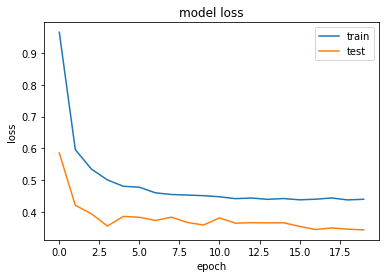

In [159]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [160]:

yhat = model.predict(test_X)

test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
#= inv_yhat[:,0]


In [161]:


# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)



Test RMSE: 3.776


In [100]:
inv_yhat.size

17068

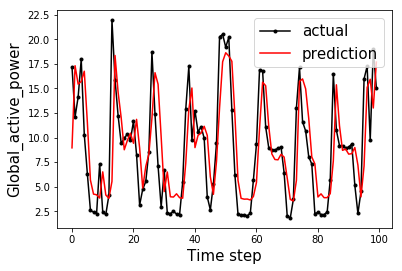

In [171]:
aa=[x for x in range(100)]
plt.plot(aa, inv_y[:100], 'black',marker='.', label="actual")
plt.plot(aa, inv_yhat[:100],'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()